## Extinction Curves

Import

In [5]:
import numpy as np
from astropy.modeling.models import BlackBody
import astropy.units as u
import matplotlib.pyplot as plt
from dust_extinction.parameter_averages import G23
from dust_extinction.parameter_averages import F19
from dust_extinction.parameter_averages import F99
import sncosmo
import pandas as pd
from bayesn import SEDmodel

##Second program
import extinction

In [2]:
# wavelengths and spectrum are 1D arrays
# wavelengths between 1000 and 30000 A
wavelengths = np.logspace(np.log10(0.1), np.log10(1.85), num=1000)*u.micron
#wavelengths2 = np.logspace(np.log10(0.3), np.log10(3.0), num=1000)*u.micron
bb_lam = BlackBody(10000*u.K, scale=1.0 * u.erg / (u.cm ** 2 * u.AA * u.s * u.sr))
spectrum = bb_lam(wavelengths)

In [10]:
# define the model
supernova_name = "sn2002cv"
sampleSummaryDirG23 = "DustLawsFitOfAllSamples/"+supernova_name + "G23_fit_summary.csv"
samplesSummaryG23 = pd.read_csv(sampleSummaryDirG23)
samplesSummaryG23 = samplesSummaryG23.rename(index=samplesSummaryG23['Unnamed: 0'])
sampleSummaryDirF99 = "DustLawsFitOfAllSamples/"+supernova_name + "F99_fit_summary.csv"
samplesSummaryF99 = pd.read_csv(sampleSummaryDirF99)
samplesSummaryF99 = samplesSummaryF99.rename(index=samplesSummaryF99['Unnamed: 0'])
sampleSummaryDirF19 = "DustLawsFitOfAllSamples/"+supernova_name + "F19_fit_summary.csv"
samplesSummaryF19 = pd.read_csv(sampleSummaryDirF19)
samplesSummaryF19 = samplesSummaryF19.rename(index=samplesSummaryF19['Unnamed: 0'])
RVG23=samplesSummaryG23.loc['RV[0]', 'mean']
RVF19=samplesSummaryF19.loc['RV[0]', 'mean']
RVF99=samplesSummaryF99.loc['RV[0]', 'mean']
AVG23=samplesSummaryG23.loc['AV[0]', 'mean']
AVF19=samplesSummaryF19.loc['AV[0]', 'mean']
AVF99=samplesSummaryF99.loc['AV[0]', 'mean']
extG23 = G23(Rv=RVG23)
extF19 = F19(Rv=RVF19)
extF99 = F99(Rv=RVF99)

In [11]:
# unextinguish (deredden) the spectrum
# Av = 1.55 = R(V) * E(B-V) = 3.1 * 0.5
spectrum_extG23 = spectrum*extG23.extinguish(wavelengths, Av=AVG23)
spectrum_extF19 = spectrum*extF19.extinguish(wavelengths, Av=AVF19)
spectrum_extF99 = spectrum*extF99.extinguish(wavelengths, Av=AVF99)

In [12]:
extAVG23 = AVG23*extG23(wavelengths)
extAVF19 = AVF19*extF19(wavelengths)
extAVF99 = AVF99*extF99(wavelengths)

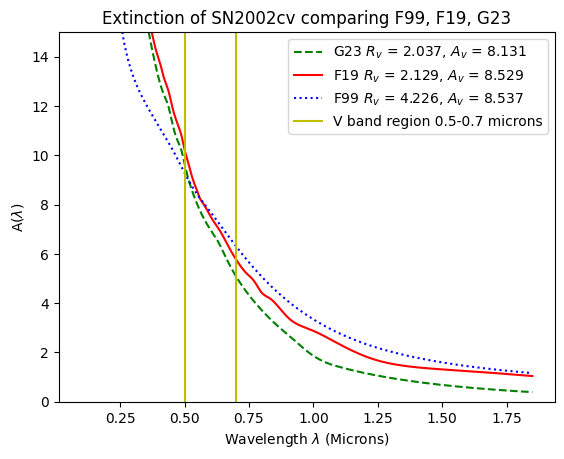

In [14]:
#plt.yscale("log")
#plt.xscale("log")
plt.xlabel(rf'Wavelength $\lambda$ (Microns)')
plt.ylabel(rf'A($\lambda$)')
plt.title('Extinction of '+ supernova +' comparing F99, F19, G23')
plt.plot(wavelengths, extAVG23, '--g', label = rf"G23 $R_v$ = {RVG23}, $A_v$ = {AVG23}")
plt.plot(wavelengths, extAVF19, '-r', label = rf"F19 $R_v$ = {RVF19}, $A_v$ = {AVF19}")
plt.plot(wavelengths, extAVF99,  ':b', label = rf"F99 $R_v$ = {RVF99}, $A_v$ = {AVF99}")
x_1 = np.linspace(0, 15, 1000)
plt.plot(x_1-x_1+0.5,x_1, 'y')
plt.plot(x_1-x_1+0.7,x_1, 'y', label = "V band region 0.5-0.7 microns")
plt.ylim(0,15)
plt.legend()
plt.savefig("/root/partiiiproject/ExtinctionCurvePlots/DustCurve"+supernova+".png", bbox_inches='tight') #save plot

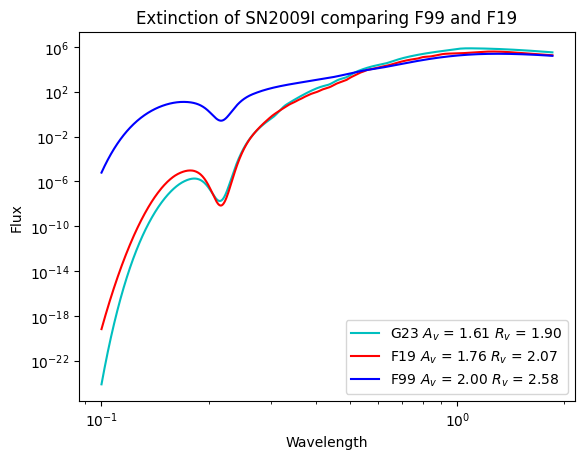

In [15]:
plt.yscale("log")
plt.xscale("log")
plt.xlabel('Wavelength')
plt.ylabel('Flux')
plt.title('Extinction of SN2009I comparing F99 and F19')
plt.plot(wavelengths, spectrum_extG23, color = 'c', label = rf"G23 $A_v$ = 1.61 $R_v$ = 1.90")
plt.plot(wavelengths, spectrum_extF19, 'r', label = rf"F19 $A_v$ = 1.76 $R_v$ = 2.07")
plt.plot(wavelengths, spectrum_extF99,  'b', label = rf"F99 $A_v$ = 2.00 $R_v$ = 2.58")
plt.legend()

## Using BayeSN to plot

In [ ]:
model = SEDmodel(load_model='W22_model', load_redlaw = 'F19')

In [ ]:
supernova_file = "/root/partiiiproject/sn2009I.Wstd_snana.dat"
supernova_name = "sn2009I"
prior_distribution = "uniform"  #"uniform" "fixed" "normal2.5"
dust_law = "F19"
drop_bands=['u_CSP']
samples, sn_props = model.fit_from_file(supernova_file, RV='uniform', drop_bands=drop_bands, redlaw=dust_law)

In [ ]:
AV = 1.90
RV = 1.61
z=model._load_redlaw('F19')
print(z)
y=z.get_axav(RV)[0]
plt.plot(model.model_wave, AV*y)